In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset into a pandas DataFrame
df = pd.read_csv('Reviews.csv')
from math import sqrt

def wilson_lower_bound(helpful_votes, total_votes, confidence=0.95):
    """
    Calculate the lower bound of Wilson Score Interval.
    
    helpful_votes: int, number of helpful votes (helpfulnessNominator)
    total_votes: int, total number of votes (helpfulnessDenominator)
    confidence: float, the desired confidence level (default: 0.95)
    
    Returns the lower bound of Wilson Score Interval as a float.
    """
    if total_votes == 0:
        return 0
    z = 1.96  # z-score for 95% confidence interval
    phat = float(helpful_votes) / total_votes
    inner_sqrt = (phat * (1 - phat) + z**2 / (4 * total_votes)) / total_votes
    if inner_sqrt < 0:
        inner_sqrt = 0  # Prevent math domain error
    denominator = 1 + z**2/total_votes
    numerator = phat + z**2 / (2 * total_votes) - z * sqrt(inner_sqrt)
    return numerator / denominator

In [5]:
df['wilson_score'] = df.apply(lambda row: wilson_lower_bound(row['HelpfulnessNumerator'], row['HelpfulnessDenominator']), axis=1)

# Set a threshold for wilson_score to filter out low helpfulness reviews
threshold = 0.15
filtered_df = df[df['wilson_score'] >= threshold]

# You can also sort the DataFrame by the Wilson Score
sorted_df = df.sort_values(by='wilson_score', ascending=False)

In [6]:
filtered_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,wilson_score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.206543
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.206543
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.438494
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,0.206543
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,0.206543
...,...,...,...,...,...,...,...,...,...,...,...
568440,568441,B005ZC0RRO,A2TO5R8QLIITEF,SAK,1,1,5,1323734400,"Delicious, all natural and allergy free treats!",Indie Candy's gummies are absolutely delicious...,0.206543
568444,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,1245369600,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po...",0.438494
568445,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A...",0.342372
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",0.342372


In [7]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,wilson_score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.206543
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.000000
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.206543
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.438494
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,0.000000
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,0.000000
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",0.342372
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,0.206543


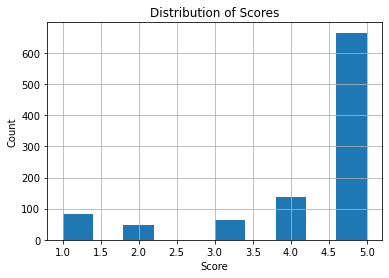

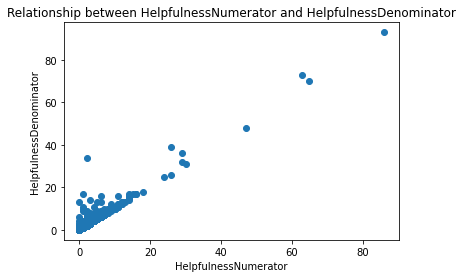

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset into a pandas DataFrame
df = pd.read_csv('Reviews.csv')
df_new = df.sample(n=1000)

# Plot a histogram of the Score column
df_new['Score'].hist()
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show()

# Scatter plot of HelpfulnessNumerator vs. HelpfulnessDenominator
plt.scatter(df_new['HelpfulnessNumerator'], df_new['HelpfulnessDenominator'])
plt.xlabel('HelpfulnessNumerator')
plt.ylabel('HelpfulnessDenominator')
plt.title('Relationship between HelpfulnessNumerator and HelpfulnessDenominator')
plt.show()



In [9]:
# Sort df_new in descending order by 'HelpfulnessDenominator'
df_new_sorted = df_new.sort_values(by='HelpfulnessDenominator', ascending=False)
df_new_sorted

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
450765,450766,B0000V8IOE,A3RLS30LZ10PK9,"J. Emerson ""j_emer""",86,93,3,1269993600,Not exactly what I expected,I bought this coffee after reading the reviews...
193115,193116,B000KNHFKU,A1TQIPT2QBAS6Z,Ddanimal,63,73,1,1297036800,"Agave ""Nectar"" is a scam","from Jonny Bowden, PhD, C.N.S.:<br /><br />Aga..."
204886,204887,B000UYIPYY,A24KH2LLYGFSTP,CleffedUp,65,70,5,1258675200,Evil.,These pretzels are evil. When my snacking come...
409973,409974,B004AWTR6M,A2JDPFVB8GC94E,"E. Gain ""High-Tech Touch""",47,48,5,1291939200,"Great Cider, but overpriced here",I agree with Texas Mom and would recommend tha...
437435,437436,B001EO5RLI,A3OA1O0OVX3RHE,Jeffrey S,26,39,1,1214956800,Amazon Shipping STALE product,I have been enjoying & purchasing Nature's Pat...
...,...,...,...,...,...,...,...,...,...,...
196009,196010,B001YXRRIA,A1BNF4FGZKD5TF,Wanderer,0,0,5,1334361600,These are the best tortilla chips. (Karen = mo...,I have no words to describe how stupid Karen i...
42345,42346,B0002IF5CI,A3R0O7UT6EUJXK,Brian S. Gregory,0,0,5,1326931200,Fantastic Bacon!,Fantastic bacon. It hardly shrinked at all wh...
135560,135561,B003E6IQWQ,AQON1GM8TXB0W,sara s,0,0,5,1287446400,Wonderful!!,"I give them 2 thumbs up!! Fast delivery, grea..."
405511,405512,B005K4Q4LK,A117KSTBKRLK99,sassylass,0,0,5,1327536000,yummy,This is a really good tasting flavored K cup. ...


In [10]:
# Sort df_new in descending order by 'HelpfulnessDenominator'
df_new_sorted = df_new.sort_values(by='HelpfulnessDenominator', ascending=False)

# Get the 'text' column of the second row
second_row_text = df_new_sorted.iloc[1]['Text']

print(second_row_text)

from Jonny Bowden, PhD, C.N.S.:<br /><br />Agave syrup (nectar) is basically high-fructose corn syrup masquerading as a health food.<br /><br />Sorry. Don't kill the messenger.<br /><br />It's easy to understand how agave syrup got its great reputation. Even the word "Agave" has a fine pedigree, coming from the Greek word for noble. The blue agave species- considered the best for the making agave nectar -- flourishes in rich volcanic soil. (It's also the only variety permitted to be used for the making of tequila.) And extracts from the agave plant have been shown to have anti-inflammatory and antioxidant properties.<br /><br />Unfortunately there's zero evidence that any of those compounds are present in the commercially made syrup.<br /><br />Agave nectar is an amber-colored liquid that pours more easily than honey and is considerably sweeter than sugar. The health-food crowd loves it because it is gluten-free and suitable for vegan diets, and, most especially, because it's low-glyce

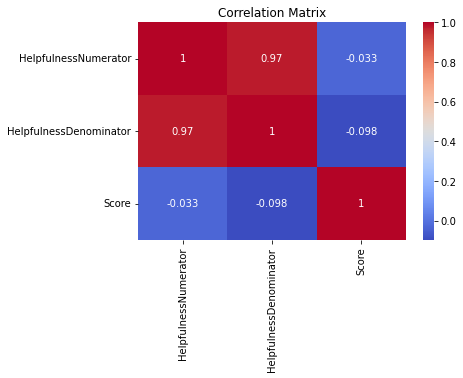

In [11]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv('Reviews.csv')

# Calculate correlation matrix
correlation_matrix = df[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score']].corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
import pandas as pd
from nltk import FreqDist
from nltk.tokenize import word_tokenize

# Read the dataset into a pandas DataFrame
df = pd.read_csv('Reviews.csv')
df_new = df.sample(n=500)

# Concatenate the 'Summary' and 'Text' columns
text_data = df_new['Summary'].astype(str) + ' ' + df_new['Text'].astype(str)

# Words to discard
discard_words = ['i', 'at', 'this', 'that', '.', 'the', ',', 'and', 'a', 'it', 'to', 'of', 'is', '!', '<', '>', 'in', '/', 'br', 'for', 'my', 'but', 'not', 'you', 'have', 'with', "'s", 'was', 'are', 'they', "n't", 'on', 'like', 'so', 'as', 'good', 'these', 'great', 'do', 'them', ')', 'or', '(', 'coffee', 'be', 'taste', 'just', 'tea', 'if', 'flavor', 'very', 'can', 'love', 'would', '*', 'we', 'product', "''", 'food', 'more', 'one', 'all', 'best', '``', 'will', 'has', 'out', 'from', 'than', 'other', 'when', 'me', 'up', 'had', 'no', 'get', 'really', 'only', 'some', 'too', 'also', 'an', '-', 'little', 'there', '...', 'make', 'did', 'about', 'your', '::', "'ve", 'tried', 'she', 'even', 'what', 'amazon', "'m", 'am', 'were', 'our', 'which', 'time', 'find']

# Tokenize the text data
tokens = [word.lower() for text in text_data for word in word_tokenize(text) if word.lower() not in discard_words]

# Calculate word frequencies
freq_dist = FreqDist(tokens)

# Get the most common words
most_common_words = freq_dist.most_common(50)

# Print the most common words and their frequencies
for word, frequency in most_common_words:
    print(f'{word}: {frequency}')

chocolate: 88
:: 84
because: 83
does: 80
price: 76
much: 75
water: 71
he: 71
try: 71
eat: 70
buy: 69
use: 69
bag: 67
been: 66
?: 65
dog: 65
delicious: 64
their: 64
any: 64
first: 63
better: 63
nice: 61
then: 61
after: 60
day: 60
&: 59
well: 57
made: 55
sugar: 55
how: 54
now: 53
into: 52
bought: 52
free: 51
think: 51
by: 51
know: 50
who: 49
could: 49
favorite: 49
healthy: 49
way: 48
used: 47
many: 47
hot: 46
cat: 46
whole: 45
most: 45
organic: 44
want: 44


In [13]:
df_high = df[df['Score'] > 2.5]
df_low = df[df['Score'] <= 2.5]

In [14]:
import pandas as pd
from nltk import FreqDist
from nltk.tokenize import word_tokenize

# Read the dataset into a pandas DataFrame

df_new = df_high.sample(n=500)

# Concatenate the 'Summary' and 'Text' columns
text_data = df_new['Summary'].astype(str) + ' ' + df_new['Text'].astype(str)

# Words to discard
discard_words = ['i', 'at', 'this', 'that', '.', 'the', ',', 'and', 'a', 'it', 'to', 'of', 'is', '!', '<', '>', 'in', '/', 'br', 'for', 'my', 'but', 'not', 'you', 'have', 'with', "'s", 'was', 'are', 'they', "n't", 'on', 'like', 'so', 'as', 'good', 'these', 'great', 'do', 'them', ')', 'or', '(', 'coffee', 'be', 'taste', 'just', 'tea', 'if', 'flavor', 'very', 'can', 'love', 'would', '*', 'we', 'product', "''", 'food', 'more', 'one', 'all', 'best', '``', 'will', 'has', 'out', 'from', 'than', 'other', 'when', 'me', 'up', 'had', 'no', 'get', 'really', 'only', 'some', 'too', 'also', 'an', '-', 'little', 'there', '...', 'make', 'did', 'about', 'your', '::', "'ve", 'tried', 'she', 'even', 'what', 'amazon', "'m", 'am', 'were', 'our', 'which', 'time', 'find']

# Tokenize the text data
tokens = [word.lower() for text in text_data for word in word_tokenize(text) if word.lower() not in discard_words]

# Calculate word frequencies
freq_dist = FreqDist(tokens)

# Get the most common words
most_common_words = freq_dist.most_common(50)

# Print the most common words and their frequencies
for word, frequency in most_common_words:
    print(f'{word}: {frequency}')

much: 80
use: 78
he: 76
price: 73
better: 72
buy: 71
try: 68
because: 68
:: 66
after: 64
eat: 64
well: 64
by: 63
delicious: 62
does: 62
dog: 61
&: 59
drink: 57
nice: 56
favorite: 56
now: 56
been: 56
sweet: 55
bag: 55
any: 54
water: 54
chocolate: 52
first: 52
could: 52
used: 52
lot: 51
think: 50
day: 48
treat: 48
then: 47
sugar: 46
go: 46
flavors: 46
healthy: 46
most: 46
its: 45
loves: 45
right: 44
tasty: 44
recommend: 44
bit: 44
their: 43
without: 43
order: 43
keep: 43


In [15]:
import pandas as pd
from nltk import FreqDist
from nltk.tokenize import word_tokenize

# Read the dataset into a pandas DataFrame

df_new = df_low.sample(n=500)

# Concatenate the 'Summary' and 'Text' columns
text_data = df_new['Summary'].astype(str) + ' ' + df_new['Text'].astype(str)

# Words to discard
discard_words = ['i', 'at', 'this', 'that', '.', 'the', ',', 'and', 'a', 'it', 'to', 'of', 'is', '!', '<', '>', 'in', '/', 'br', 'for', 'my', 'but', 'not', 'you', 'have', 'with', "'s", 'was', 'are', 'they', "n't", 'on', 'like', 'so', 'as', 'good', 'these', 'great', 'do', 'them', ')', 'or', '(', 'coffee', 'be', 'taste', 'just', 'tea', 'if', 'flavor', 'very', 'can', 'love', 'would', '*', 'we', 'product', "''", 'food', 'more', 'one', 'all', 'best', '``', 'will', 'has', 'out', 'from', 'than', 'other', 'when', 'me', 'up', 'had', 'no', 'get', 'really', 'only', 'some', 'too', 'also', 'an', '-', 'little', 'there', '...', 'make', 'did', 'about', 'your', '::', "'ve", 'tried', 'she', 'even', 'what', 'amazon', "'m", 'am', 'were', 'our', 'which', 'time', 'find']

# Tokenize the text data
tokens = [word.lower() for text in text_data for word in word_tokenize(text) if word.lower() not in discard_words]

# Calculate word frequencies
freq_dist = FreqDist(tokens)

# Get the most common words
most_common_words = freq_dist.most_common(50)

# Print the most common words and their frequencies
for word, frequency in most_common_words:
    print(f'{word}: {frequency}')

?: 148
because: 98
buy: 96
$: 94
dog: 93
does: 92
after: 88
could: 83
by: 82
much: 81
any: 80
:: 80
their: 79
again: 78
bought: 74
first: 74
bad: 74
now: 73
try: 72
been: 69
made: 68
eat: 67
water: 65
use: 62
give: 62
her: 62
know: 60
thought: 58
well: 57
never: 57
price: 55
box: 54
disappointed: 54
better: 54
who: 54
used: 54
company: 53
same: 52
two: 52
chocolate: 52
got: 52
ordered: 52
think: 51
tastes: 51
then: 50
chips: 50
back: 50
something: 50
cookies: 49
how: 48


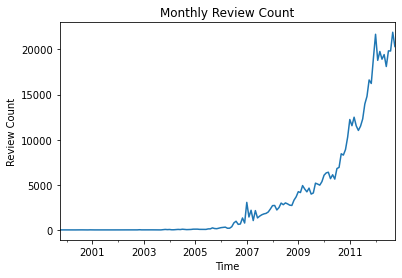

In [13]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv('Reviews.csv')

# Convert the 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], unit='s')

# Set the 'Time' column as the index
df.set_index('Time', inplace=True)

# Resample the data to a specific time frequency (e.g., monthly)
monthly_counts = df['Id'].resample('M').count()

# Plot the monthly review counts
monthly_counts.plot()
plt.xlabel('Time')
plt.ylabel('Review Count')
plt.title('Monthly Review Count')
plt.show()

In [ ]:
df_high = df[df['Score'] > 2.5]

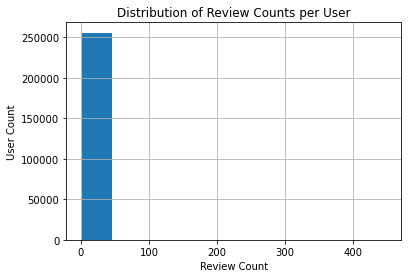

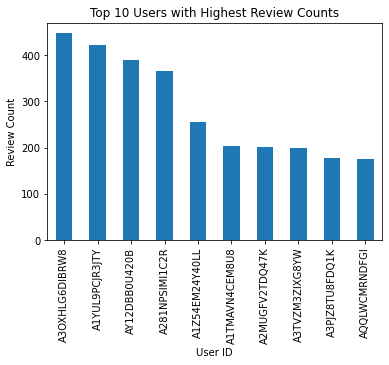

In [14]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv('Reviews.csv')

# Group the data by 'UserId' and calculate the count of reviews per user
user_review_counts = df.groupby('UserId')['Id'].count()

# Plot a histogram of the review counts per user
user_review_counts.hist()
plt.xlabel('Review Count')
plt.ylabel('User Count')
plt.title('Distribution of Review Counts per User')
plt.show()

# Get the top 10 users with the highest review counts
top_users = user_review_counts.nlargest(10)

# Plot a bar chart of the top users
top_users.plot(kind='bar')
plt.xlabel('User ID')
plt.ylabel('Review Count')
plt.title('Top 10 Users with Highest Review Counts')
plt.show()

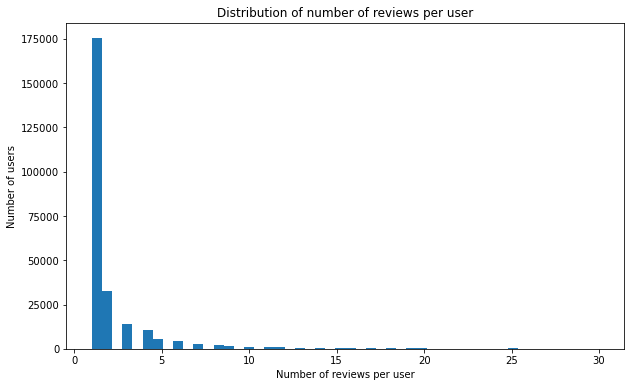

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset into a pandas DataFrame
df = pd.read_csv('Reviews.csv')

# Count the number of reviews per user
reviews_per_user = df['UserId'].value_counts()

# Filter out users with more than 100 reviews
filtered_reviews_per_user = reviews_per_user[reviews_per_user <= 30]

# Plot the count of reviews per user
plt.figure(figsize=(10,6))
plt.hist(filtered_reviews_per_user, bins=50)
plt.xlabel('Number of reviews per user')
plt.ylabel('Number of users')
plt.title('Distribution of number of reviews per user')
plt.show()

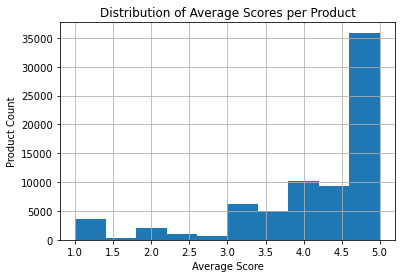

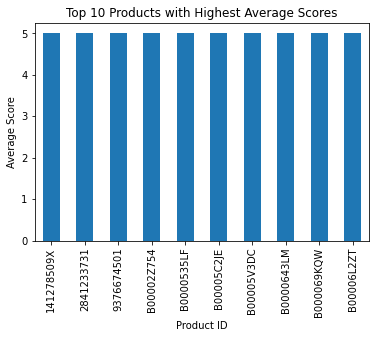

In [15]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv('Reviews.csv')

# Calculate the average score for each product
product_avg_scores = df.groupby('ProductId')['Score'].mean()

# Plot a histogram of the average scores per product
product_avg_scores.hist()
plt.xlabel('Average Score')
plt.ylabel('Product Count')
plt.title('Distribution of Average Scores per Product')
plt.show()

# Get the top 10 products with the highest average scores
top_products = product_avg_scores.nlargest(10)

# Plot a bar chart of the top products
top_products.plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('Average Score')
plt.title('Top 10 Products with Highest Average Scores')
plt.show()

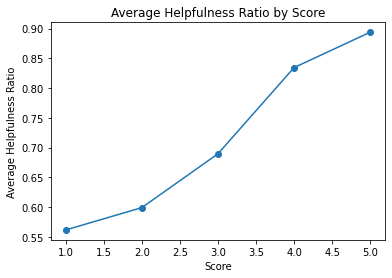

Correlation between Review Length and Helpfulness: 0.1708344977656529


In [16]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv('Reviews.csv')

# Calculate the average helpfulness ratio (Numerator / Denominator) for each score
avg_helpfulness_ratio = df.groupby('Score').apply(lambda x: x['HelpfulnessNumerator'].sum() / x['HelpfulnessDenominator'].sum())

# Plot a line chart of the average helpfulness ratio by score
avg_helpfulness_ratio.plot(marker='o')
plt.xlabel('Score')
plt.ylabel('Average Helpfulness Ratio')
plt.title('Average Helpfulness Ratio by Score')
plt.show()

# Calculate the correlation between review length and helpfulness
correlation = df['Text'].str.len().corr(df['HelpfulnessNumerator'])
print(f"Correlation between Review Length and Helpfulness: {correlation}")

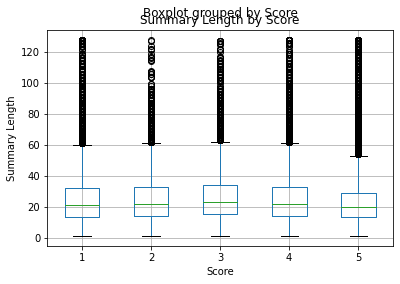

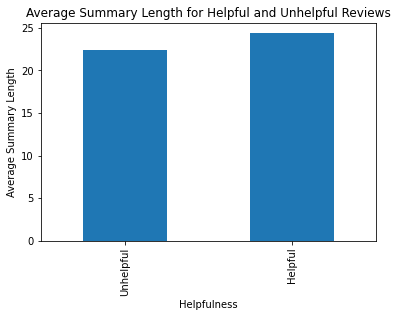

In [17]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv('Reviews.csv')

# Calculate the length of review summaries
df['SummaryLength'] = df['Summary'].str.len()

# Plot a box plot of summary length by score
df.boxplot(column='SummaryLength', by='Score')
plt.xlabel('Score')
plt.ylabel('Summary Length')
plt.title('Summary Length by Score')
plt.show()

# Calculate the average summary length for helpful and unhelpful reviews
avg_summary_length = df.groupby(df['HelpfulnessDenominator'] > 0)['SummaryLength'].mean()
avg_summary_length.plot(kind='bar')
plt.xlabel('Helpfulness')
plt.ylabel('Average Summary Length')
plt.title('Average Summary Length for Helpful and Unhelpful Reviews')
plt.xticks([0, 1], ['Unhelpful', 'Helpful'])
plt.show()

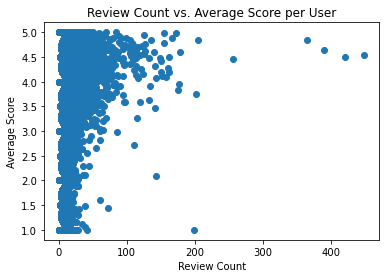

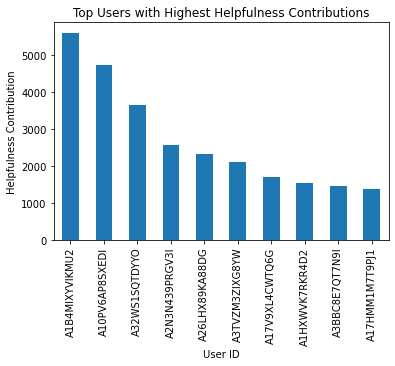

In [18]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv('Reviews.csv')

# Calculate the review count and average score per user
user_stats = df.groupby('UserId').agg({'Id': 'count', 'Score': 'mean'})

# Plot a scatter plot of review count vs. average score
plt.scatter(user_stats['Id'], user_stats['Score'])
plt.xlabel('Review Count')
plt.ylabel('Average Score')
plt.title('Review Count vs. Average Score per User')
plt.show()

# Calculate the top users with the highest helpfulness contributions
top_users = df.groupby('UserId')['HelpfulnessNumerator'].sum().nlargest(10)

# Plot a bar chart of the top users
top_users.plot(kind='bar')
plt.xlabel('User ID')
plt.ylabel('Helpfulness Contribution')
plt.title('Top Users with Highest Helpfulness Contributions')
plt.show()

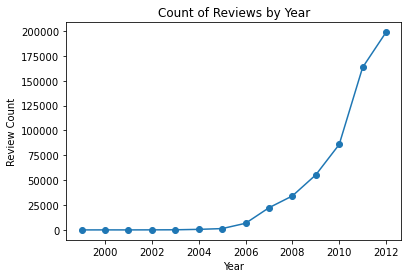

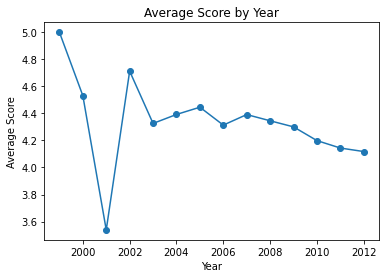

In [19]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv('Reviews.csv')

# Convert the 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], unit='s')

# Extract the year from the 'Time' column
df['Year'] = df['Time'].dt.year

# Plot a line chart of the count of reviews by year
review_counts = df['Year'].value_counts().sort_index()
review_counts.plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Review Count')
plt.title('Count of Reviews by Year')
plt.show()

# Calculate the average score by year
avg_scores = df.groupby('Year')['Score'].mean()
avg_scores.plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.title('Average Score by Year')
plt.show()

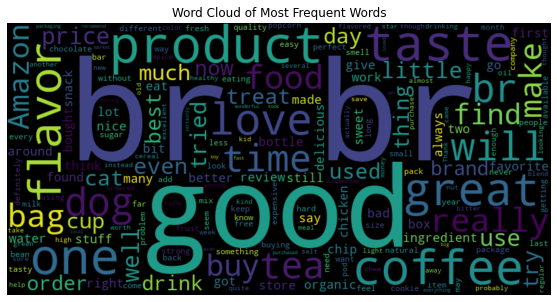

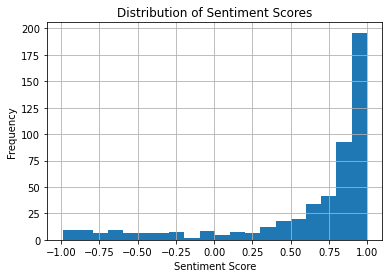

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer

# Read the dataset into a pandas DataFrame
df = pd.read_csv('Reviews.csv')
df_new = df.sample(n=500)

# Instantiate the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Concatenate the text of all reviews
text = ' '.join(df_new['Text'])

# Create a word cloud of the most frequent words
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()

# Perform sentiment analysis on the reviews
sentiment_scores = df_new['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])
sentiment_scores.hist(bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()

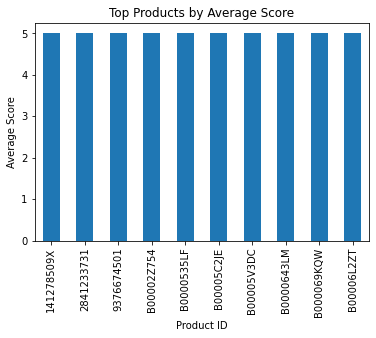

Correlation between Average Score and Helpfulness: -0.1184192507805596


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset into a pandas DataFrame
df = pd.read_csv('Reviews.csv')

# Calculate the average score per product
avg_scores = df.groupby('ProductId')['Score'].mean()

# Plot a bar chart of the top products by average score
top_products = avg_scores.nlargest(10)
top_products.plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('Average Score')
plt.title('Top Products by Average Score')
plt.show()

# Calculate the correlation between average score and helpfulness
correlation = avg_scores.corr(df.groupby('ProductId')['HelpfulnessDenominator'].mean())
print(f"Correlation between Average Score and Helpfulness: {correlation}")